# Introduction

##### Objective 
- make a model prediction to get insight what services need to be improved and impact on increasing customer satisfaction of Invistico Airlines.

##### Instruction
- Data Understanding : analysis process to understand characteristic of data so that we can see overall picture of data.
- Data Preparation : things we need to clean, fix or transform data so data is ready to enter modelling process.
- Modelling : do experiments to some machine learning model.
- Evaluation : By evaluating, quality of model will be maintained, so it can minimizing error of prediction results.
- Insight : get some conclusion which help us to find out what services need to be improved.

## Libraries

In [37]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy Score (Test Set): %.2f' % accuracy_score(ytest, pred))
    print('Precision Score (Test Set): %.2f' % precision_score(ytest, pred, pos_label=0))
    print('Recall Score (Test Set): %.2f' % recall_score(ytest, pred, pos_label=0))
    print('F1 Score (Test Set): %.2f' % f1_score(ytest, pred, pos_label=0))
    
    fpr, tpr, tresholds = roc_curve(ytest, pred, pos_label=0)
    print('AUC Score (Test Set): %.2f' % auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# Load and Describe Data

in this project, we create our dataset into 3 different dataset:
- data as the orginal data, used from exploratory data analysis (EDA) until ready to enter Modelling process
- data_awal as comparison data before improvement of features (data already through EDA, Data Preprocessing, and drop several columns).
- df_compare as data after improvement of features to see impact on the level of customer satisfaction (data already through EDA, Data Preprocessing, and drop several columns).

## Load Data

we load Invistico Airlines dataset and we see top 5 rows of data

In [38]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Exploratory Data Analysis (EDA)

#### Describe Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

- total row = 129880
- total feature = 23

In [4]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Check Null and Missing Values

In [5]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

#### check duplicated data

In [6]:
data.duplicated().sum()

0

**percentage of satisfied and dissatisfied customer of Invistico Airlines**

In [60]:
data_satisfaction = data.groupby(['satisfaction'])[['satisfaction']].count()
data_satisfaction['percentage'] = round((data_satisfaction/len(data))*100,2)
data_satisfaction = data_satisfaction.sort_values('percentage', ascending=False)
data_satisfaction

,satisfaction,percentage
satisfaction,,
satisfied,71087,54.73
dissatisfied,58793,45.27


dissatisfied rate reached 45% of total customers

**check distribution of customers based on type of travel and class**

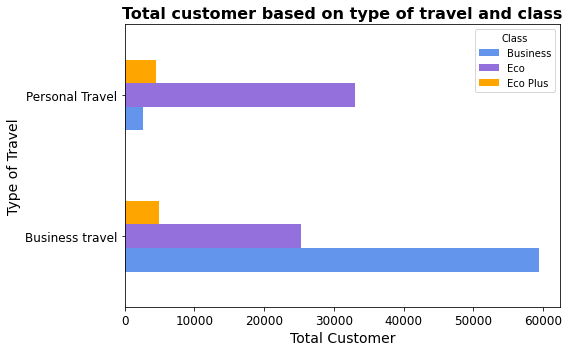

In [12]:
data1 = data.groupby(['Type of Travel', 'Class'])['satisfaction'].count().reset_index().sort_values('satisfaction', ascending=False)
total_customer = data1.pivot_table(index='Type of Travel', columns='Class', values='satisfaction')
total_customer.plot(kind='barh',figsize=(8,5), color =['cornflowerblue', 'mediumpurple', 'orange']);
plt.title ('Total customer based on type of travel and class', fontsize=16, fontweight = 'bold')
plt.xlabel('Total Customer', fontsize = 14)
plt.ylabel('Type of Travel', fontsize=14)
plt.tick_params(axis='both', which ='major', labelsize=12)
plt.tight_layout()

Top 3 :
- Business travel - business class
- Personal travel - eco class
- Business travel - eco class

**check distribution of dissatisfied customer based on type of travel and class**

In [7]:
dissatisfied = data[data['satisfaction'] == 'dissatisfied']

In [8]:
data_dissatisfied = dissatisfied.groupby(['Type of Travel', 'Class'])['satisfaction'].count().reset_index(name='dissatisfaction').sort_values('dissatisfaction', ascending=False)
data_dissatisfied

,Type of Travel,Class,dissatisfaction
1,Business travel,Eco,17726
4,Personal Travel,Eco,17610
0,Business travel,Business,16634
2,Business travel,Eco Plus,2977
5,Personal Travel,Eco Plus,2415
3,Personal Travel,Business,1431


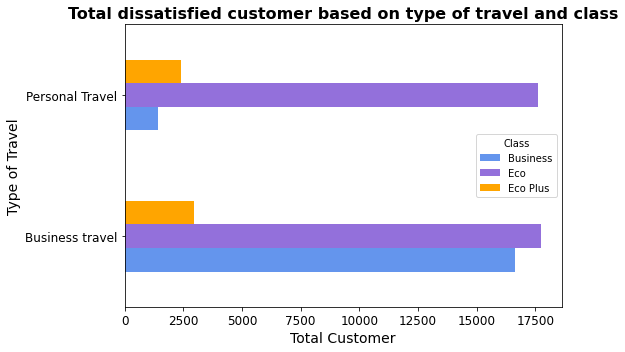

In [13]:
data_dissatisfied = dissatisfied.groupby(['Type of Travel', 'Class'])['satisfaction'].count().reset_index(name='dissatisfaction').sort_values('dissatisfaction', ascending=False)
total_dissatisfied = data_dissatisfied.pivot_table(index='Type of Travel', columns='Class', values='dissatisfaction')
total_dissatisfied.plot(kind='barh',figsize=(8,5), color =['cornflowerblue', 'mediumpurple', 'orange']);
plt.title('Total dissatisfied customer based on type of travel and class', fontsize = 16, fontweight='bold')
plt.xlabel('Total Customer', fontsize=14)
plt.ylabel('Type of Travel', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

most dissatisfied customer:
- Bussiness travel - Eco Class
- Personal travel - Eco Class

Based on the conclusion above, Business travel - Eco Class and Personal Travel - Eco Class have most dissatisfied customer and also at top 2 and top 3 user using this travel and class, so we will focus on these segments to increase satisfaction rate.

**Correlation Feature between services and satisfaction rate of customers**

1. Business Travel - Eco Class

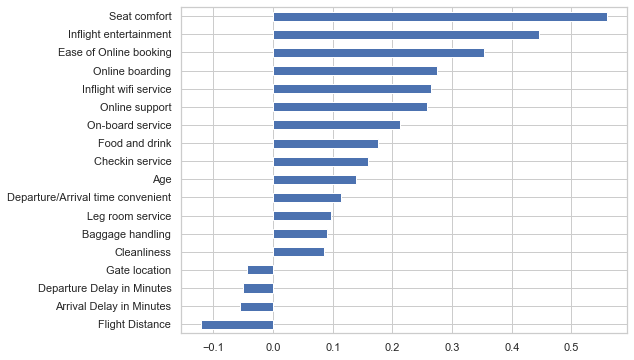

In [21]:
buss_eco = data[(data['Type of Travel'] == 'Business travel') & (data.Class == 'Eco')]
buss_eco.corr()['satisfaction_label'].sort_values().drop('satisfaction_label').plot(kind='barh', figsize=(8,6));

**conclusion** : the most correlated feature is **seat comfort**

2. Personal Travel - Eco Class

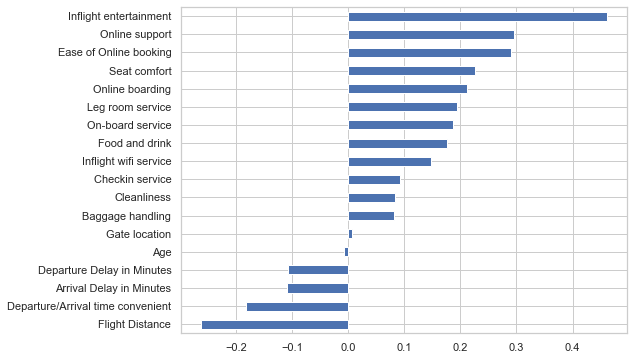

In [22]:
pers_eco = data[(data['Type of Travel'] == 'Personal Travel') & (data.Class == 'Eco')]
pers_eco.corr()['satisfaction_label'].sort_values().drop('satisfaction_label').plot(kind='barh', figsize=(8,6));

**conclusion** : the most correlated feature is **inflight entertaiment**

## Separated Numerical, Categorical, and Ordinal Data

In [14]:
numerical= ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [15]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [16]:
ordinal = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
          'Gate location', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

1. value counting of categorical data

In [65]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Gender:
Female    65899
Male      63981
Name: Gender, dtype: int64

Value count kolom Customer Type:
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Value count kolom Type of Travel:
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Value count kolom Class:
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64



**conclusion** : 
- Gender has 2 unique values
- Customer Type has 2 unique values
- Type of Travel has 2 unique values
- Class has 3 unique values

2. value counting of ordinal data

In [64]:
for col in ordinal:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Seat comfort:
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64

Value count kolom Departure/Arrival time convenient:
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64

Value count kolom Food and drink:
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: Food and drink, dtype: int64

Value count kolom Inflight wifi service:
4    31560
5    28830
3    27602
2    27045
1    14711
0      132
Name: Inflight wifi service, dtype: int64

Value count kolom Inflight entertainment:
4    41879
5    29831
3    24200
2    19183
1    11809
0     2978
Name: Inflight entertainment, dtype: int64

Value count kolom Online support:
4    41510
5    35563
3    21609
2    17260
1    13937
0        1
Name: Online support, dtype: int64

Value count kolom Gate location:
3    33546
4    30088
2    24518
1    22565
5    19161
0        2
Name: Gate location, 

**conclusion** : there are several features have value 0, while for this rating we assume from 1-5. Therefore, we will give treatment for data with 0 value later.

## Graphical Approach

### Univariate Analysis
*Do data analysis for each feature separately, look the distrbution of data in details*

1. distribution of numerical data

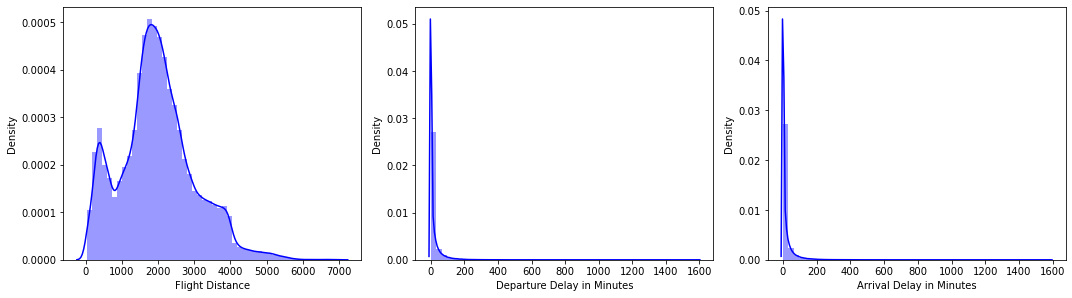

In [17]:
plt.figure(figsize=(15, 12))
for i in range(0, len(numerical)):
    plt.subplot(3, len(numerical), i+1)
    sns.distplot(data[numerical[i]], color='blue')
    plt.tight_layout()

**conclusion** : the graph is positively skewed, then we will give treatment to change data distribution to be more normal.

### Multivariate Analysis
*Analyze multiple columns at once to find relationships between columns*

<AxesSubplot:>

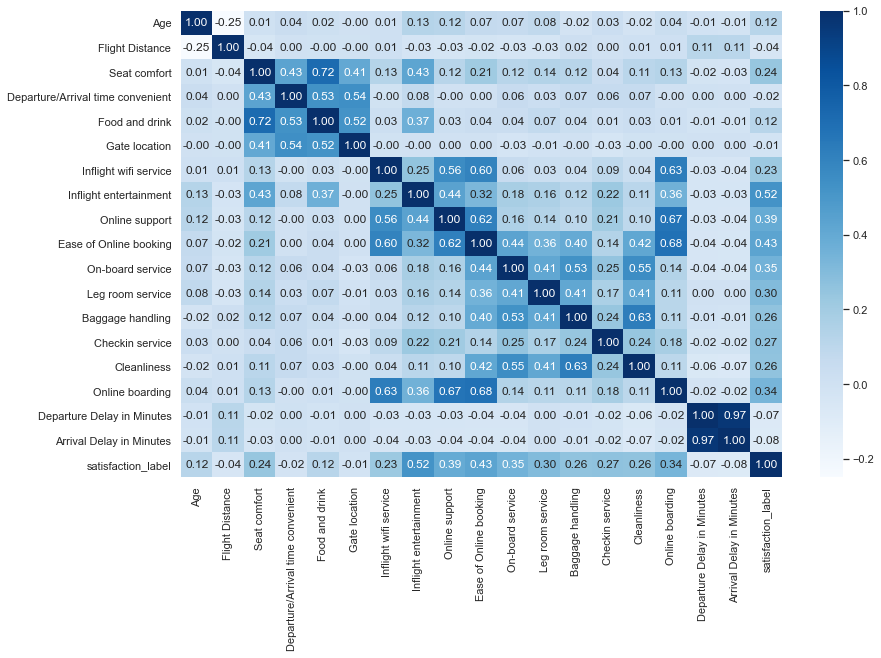

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

**conclusion**: 
- Features that are highly correlated with the target(satisfaction_label) are inflight entertainment and ease of online booking
- Features that have a strong correlation are arrival delay and departure delay. because the correlation is very high at 0.97, then one of the columns will be removed.

# Data Preprocessing

#### Fix Missing Values

In [39]:
data.dropna(inplace=True)

we drop missing values in Arrival Delay in Minutes columns because it's only 0.3% of data.

#### change value 0 in the ordinal data to the mode in each column

In [40]:
for col in ordinal:
    modus = data[col].mode()[0]
    data[col] = data[col].replace(0, modus)

#### treatment outliers with log transfrom

In [41]:
for var in numerical:
    data[var]= (data[var]+1).apply(np.log)

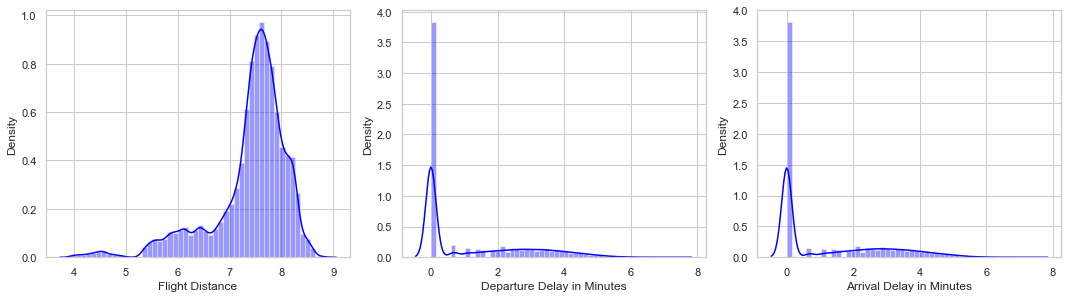

In [78]:
plt.figure(figsize=(15, 12))
for i in range(0, len(numerical)):
    plt.subplot(3, len(numerical), i+1)
    sns.distplot(data[nums[i]], color='blue')
    plt.tight_layout()

**conclusion** : treatment for outliers has been carried out using log transformation and data distribution is slightly more normal.

## Feature Engineering

### use one hot encoding for categorical data

In [42]:
for cat in categorical:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

# Machine Learning Modelling and Evaluation

make new columns (satisfaction_label) use label encoding to change satisfaction column into numeric value.
- 0 = dissatified
- 1 = satisfied

In [43]:
data['satisfaction_label'] = data['satisfaction'].astype('category').cat.codes

## split data training dan data testing

In [44]:
x = data.drop(columns=['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes', 'satisfaction_label'])
y = data['satisfaction_label'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

#concat
data_train = pd.concat([xtrain, ytrain], axis=1)
data_test = pd.concat([xtest, ytest], axis=1)

#standard
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(data_train)
std_train = scaler.transform(data_train)
std_test = scaler.transform(data_test)

#turn into dataframe
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test = pd.DataFrame(std_test, columns=data_test.columns)

#re-split data
xtrain_std = std_train.drop('satisfaction_label', axis=1)
ytrain_std = std_train.satisfaction_label
xtest_std = std_test.drop('satisfaction_label', axis=1)
ytest_std = std_test.satisfaction_label

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [49]:
models = {
    'Logreg' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Ada Boost' : AdaBoostClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'XGBoost' : XGBClassifier()
}

for model_name, model in models.items():
    model.fit(xtrain_std, ytrain_std)
    ypred = model.predict(xtest_std)
    print('Evaluation Model {}'.format(model_name))
    print(eval_classification(model, ypred, xtrain_std, ytrain_std, xtest_std, ytest_std), '\n')
    print('Train score: ' + str(model.score(xtrain_std, ytrain_std))) 
    print('Test score:' + str(model.score(xtest_std, ytest_std)), '\n')

Evaluation Model Logreg
Accuracy Score (Test Set): 0.85
Precision Score (Test Set): 0.86
Recall Score (Test Set): 0.88
F1 Score (Test Set): 0.87
AUC Score (Test Set): 0.85
None 

Train score: 0.8524746836054021
Test score:0.8533477488609159 

Evaluation Model KNN
Accuracy Score (Test Set): 0.92
Precision Score (Test Set): 0.93
Recall Score (Test Set): 0.92
F1 Score (Test Set): 0.92
AUC Score (Test Set): 0.92
None 

Train score: 0.9412485881705587
Test score:0.9181017839215383 

Evaluation Model Decision Tree
Accuracy Score (Test Set): 0.93
Precision Score (Test Set): 0.94
Recall Score (Test Set): 0.94
F1 Score (Test Set): 0.94
AUC Score (Test Set): 0.93
None 

Train score: 1.0
Test score:0.9344737045331686 

Evaluation Model Ada Boost
Accuracy Score (Test Set): 0.88
Precision Score (Test Set): 0.89
Recall Score (Test Set): 0.89
F1 Score (Test Set): 0.89
AUC Score (Test Set): 0.88
None 

Train score: 0.881145681491278
Test score:0.8821530620125106 

Evaluation Model Random Forest
Accura

**conclusion** : because model with highest precision value is Random Forest and XGBoost, 0.97. Next, we will do hyperparameter tuning for both models.

In [52]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(random_state=42)
#model.fit(X_train, y_train)
models['Logreg'].fit(xtrain_std, ytrain_std)
ypred = models['Logreg'].predict(xtest_std)
eval_classification(model, ypred, xtrain_std, ytrain_std, xtest_std, ytest_std)

Accuracy Score (Test Set): 0.85
Precision Score (Test Set): 0.86
Recall Score (Test Set): 0.88
F1 Score (Test Set): 0.87
AUC Score (Test Set): 0.85


## Hyperparameter Tuning Random Forest

In [99]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(xtrain_std, ytrain_std)

# Predict & Evaluation
ypred = rf_tuned.predict(xtest_std)#Check performa dari model
eval_classification(rf_tuned, ypred, xtrain_std, ytrain_std, xtest_std, ytest_std)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.96


##### accuracy score

In [100]:
print('Train score: ' + str(rf_tuned.score(xtrain_std, ytrain_std)) 
print('Test score:' + str(rf_tuned.score(xtest_std, ytest_std))) 

Train score: 0.9994170538253635
Test score:0.9643421998562185


In [101]:
print('Best n_estimators:', rf_tuned.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', rf_tuned.best_estimator_.get_params()['criterion'])
print('Best max_depth:', rf_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', rf_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', rf_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', rf_tuned.best_estimator_.get_params()['max_features'])

Best n_estimators: 400
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2


### feature importance

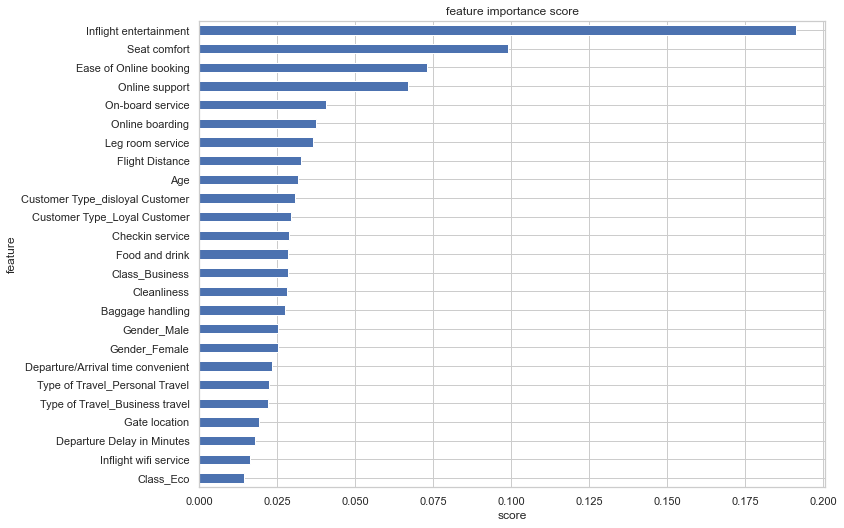

In [102]:
show_feature_importance(rf_tuned.best_estimator_)

## Hyperparameter Tuning XGBoost

In [103]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'verbosity': [0]
                    }


# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(xtrain_std, ytrain_std)

# Predict & Evaluation
ypred = xg_tuned.predict(xtest_std)#Check performa dari model
eval_classification(xg_tuned, ypred, xtrain_std, ytrain_std, xtest_std, ytest_std)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


##### accuracy score

In [104]:
print('Train score: ' + str(xg_tuned.score(xtrain_std, ytrain_std))) 
print('Test score:' + str(xg_tuned.score(xtest_std, ytest_std)))

Train score: 0.9885207037307713
Test score:0.9686599423631124


In [105]:
print('Best max_depth:', xg_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_child_weight:', xg_tuned.best_estimator_.get_params()['min_child_weight'])
print('Best gamma:', xg_tuned.best_estimator_.get_params()['gamma'])
print('Best tree_method:', xg_tuned.best_estimator_.get_params()['tree_method'])
print('Best colsample_bytree:', xg_tuned.best_estimator_.get_params()['colsample_bytree'])
print('Best eta:', xg_tuned.best_estimator_.get_params()['eta'])
print('Best lambda:', xg_tuned.best_estimator_.get_params()['lambda'])
print('Best alpha:', xg_tuned.best_estimator_.get_params()['alpha'])

Best max_depth: 50
Best min_child_weight: 20
Best gamma: 0.1
Best tree_method: hist
Best colsample_bytree: 0.8
Best eta: 0.20202020202020204
Best lambda: 0.4
Best alpha: 0.7000000000000001


### feature importance

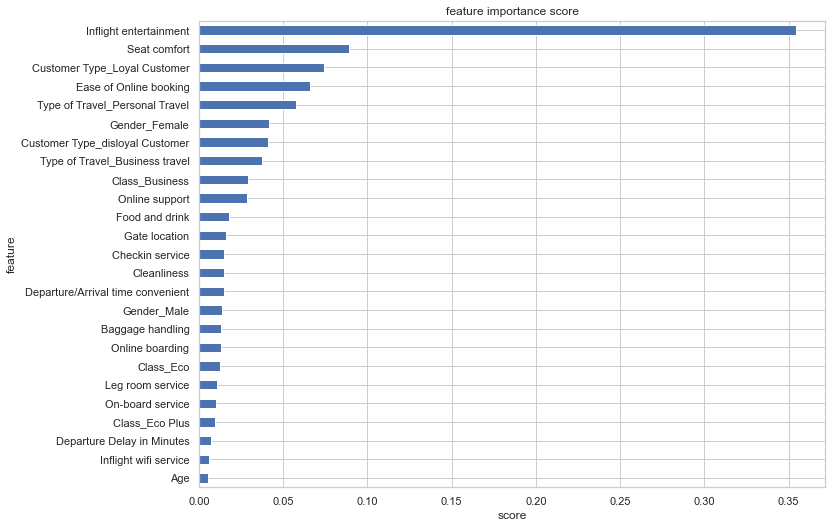

In [106]:
show_feature_importance(xg_tuned.best_estimator_)

**conclusion** : 
- as we can see, precision of XGBoost Model is 0.97 which have same value as before tuning but precision of Random Forest Model is down to 0.96. So, we gonna choose best model is XGBoost before tuning because computing is quite fast. Other than that, accuracy score between data training and data testing not much different, so we conclude that there is no overfitting.

- if we look at feature importance, top 2 features is Inflight Entertaiment and Seat Comfort looks like feature correlation of Business Travel - Eco Class and Personal Travel - Eco Class. So, we will do some improvement to this features. Hopefully, it can increase customer satisfaction.

## Simulation of improving 2 features and their effect on customer satisfaction

we make new variabel as data_awal to compare satisfaction customer after we improving 2 features.

In [82]:
data_awal = data.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes'])

### We will improve Inflight Entertaiment Service of Personal Travel - Eco Class
*we assumed that customer will be satisfied and give rating 4 or 5*

In [83]:
#filter data (personal travel- eco class)
pers_eco = data[(data['Type of Travel']== 'Personal Travel') & (data['Class']== 'Eco')] 

In [84]:
#delete categorical data and arrival delay
pers_eco = pers_eco.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes'])

In [85]:
# use all filtered data, delete satisfaction and satisfaction label column
sample_pers_eco = pers_eco.sample(frac=1, random_state=42)
x_pers_eco = sample_pers_eco.drop(columns=['satisfaction', 'satisfaction_label'])
x_pers_eco.reset_index(inplace=True, drop=True)
x_pers_eco

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,53,0.673069,3,4,3,2,2,3,2,2,...,0.000000,0,1,1,0,0,1,0,1,0
1,21,0.747628,2,4,2,2,2,2,2,2,...,0.325210,0,1,1,0,0,1,0,1,0
2,19,0.711522,4,4,4,1,1,4,1,1,...,0.000000,1,0,1,0,0,1,0,1,0
3,70,0.358478,5,3,3,3,5,5,5,5,...,0.587348,1,0,1,0,0,1,0,1,0
4,41,0.783013,5,2,2,2,5,5,5,5,...,0.337011,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32881,16,0.701746,4,4,4,4,1,4,4,4,...,0.553008,1,0,1,0,0,1,0,1,0
32882,53,0.773884,1,5,1,5,2,1,2,2,...,0.419217,0,1,1,0,0,1,0,1,0
32883,57,0.782843,2,4,2,3,4,2,4,4,...,0.297994,0,1,1,0,0,1,0,1,0
32884,41,0.789621,1,1,1,1,5,1,5,5,...,0.000000,0,1,1,0,0,1,0,1,0


In [86]:
#inflight entertainment column is replaced with a rating of 4 or 5 (random)
new_rate = np.random.choice(range(4,6), size = x_pers_eco.shape[0])
for i in ['Inflight entertainment']:
    x_pers_eco[i] = x_pers_eco[i].map(dict(zip(x_pers_eco[i].unique(), new_rate)))

In [87]:
#data will be predict using XGBoost
y_pers_eco = xg.predict(x_pers_eco)
y_pers_eco = pd.DataFrame(y_pers_eco.tolist())

In [88]:
#Predicted results are entered in satisfaction label column
df_pers_eco = x_pers_eco.copy()
df_pers_eco['satisfaction_label'] = y_pers_eco
df_pers_eco

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_label
0,53,0.673069,3,4,3,2,2,4,2,2,...,0,1,1,0,0,1,0,1,0,0
1,21,0.747628,2,4,2,2,2,5,2,2,...,0,1,1,0,0,1,0,1,0,0
2,19,0.711522,4,4,4,1,1,5,1,1,...,1,0,1,0,0,1,0,1,0,1
3,70,0.358478,5,3,3,3,5,4,5,5,...,1,0,1,0,0,1,0,1,0,1
4,41,0.783013,5,2,2,2,5,4,5,5,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32881,16,0.701746,4,4,4,4,1,5,4,4,...,1,0,1,0,0,1,0,1,0,1
32882,53,0.773884,1,5,1,5,2,4,2,2,...,0,1,1,0,0,1,0,1,0,0
32883,57,0.782843,2,4,2,3,4,5,4,4,...,0,1,1,0,0,1,0,1,0,0
32884,41,0.789621,1,1,1,1,5,4,5,5,...,0,1,1,0,0,1,0,1,0,1


In [89]:
#the number of dissatisfied customers which was 17610 reduced to 14336
df_pers_eco['satisfaction_label'].value_counts()

1    18550
0    14336
Name: satisfaction_label, dtype: int64

### We will improve Seat Comfort Service of Business Travel - Eco Class
*we assumed that customer will be satisfied and give rating 4 or 5*

In [90]:
# filter data (business travel- eco class)
bus_eco = data[(data['Type of Travel']== 'Business travel') & (data['Class']== 'Eco')]

In [91]:
#delete categorical data and arrival delay
bus_eco = bus_eco.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes'])

In [92]:
# use all filtered data, delete satisfaction and satisfaction label column
sample_bus_eco = bus_eco.sample(frac=1, random_state=42)
x_bus_eco = sample_bus_eco.drop(columns=['satisfaction', 'satisfaction_label'])
x_bus_eco.reset_index(inplace=True, drop=True)
x_bus_eco

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,54,0.369154,4,3,3,3,2,2,3,4,...,0.553008,1,0,1,0,1,0,0,1,0
1,42,0.746512,2,1,1,1,1,1,1,1,...,0.188014,1,0,0,1,1,0,0,1,0
2,22,0.807194,5,5,5,3,2,5,2,2,...,0.000000,0,1,0,1,1,0,0,1,0
3,25,0.757887,4,1,3,3,5,3,5,5,...,0.000000,0,1,0,1,1,0,0,1,0
4,60,0.728772,4,3,3,3,4,4,4,4,...,0.282020,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25226,36,0.647272,4,4,4,4,4,4,4,4,...,0.000000,1,0,1,0,1,0,0,1,0
25227,35,0.822951,2,2,2,5,2,2,3,2,...,0.000000,1,0,0,1,1,0,0,1,0
25228,20,0.767011,1,1,1,2,1,1,1,1,...,0.000000,1,0,0,1,1,0,0,1,0
25229,48,0.302894,2,2,5,2,4,3,3,2,...,0.000000,1,0,1,0,1,0,0,1,0


In [93]:
#seat comfort column is replaced with a rating of 4 or 5 (random)
new_rate = np.random.choice(range(4,6), size = x_bus_eco.shape[0])
for i in ['Seat comfort']:
    x_bus_eco[i] = x_bus_eco[i].map(dict(zip(x_bus_eco[i].unique(), new_rate)))

In [94]:
##data will be predict using XGBoost
y_bus_eco = xg.predict(x_bus_eco)
y_bus_eco = pd.DataFrame(y_bus_eco.tolist())

In [95]:
#Predicted results are entered in satisfaction label column
df_bus_eco = x_bus_eco.copy()
df_bus_eco['satisfaction_label'] = y_bus_eco

In [96]:
#the number of dissatisfied customers which was 17726 reduced to 4201
df_bus_eco['satisfaction_label'].value_counts()

1    21030
0     4201
Name: satisfaction_label, dtype: int64

**variabel data that have Personal Travel- Eco Class and Business Travel - Eco class data will be deleted, then replaced with data that has been improved on 2 features. Next, delete categorical data and arrival delay as before.**

In [97]:
#filter data personal travel - eco class and delete it, make new variabel named df_gabungan
df_gabungan = data[~((data['Type of Travel']== 'Personal Travel') & (data['Class']== 'Eco'))]

In [98]:
#filter data business travel - eco class and delete it, make new variabel named df_gabungan
df_gabungan = df_gabungan[~((df_gabungan['Type of Travel']== 'Business travel') & (df_gabungan['Class']== 'Eco'))]

In [99]:
#delete categorical data and arrival delay
df_gabungan = df_gabungan.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes'])

In [100]:
#Merge data from personal travel-eco class that has been upgraded to df_gabungan and make new variable name df_compare
df_compare = df_gabungan.append(df_pers_eco).drop(columns='satisfaction')

In [101]:
#Merge data from business travel-eco class that has been upgraded to df_gabungan and make new variable name df_compare
df_compare = df_compare.append(df_bus_eco)

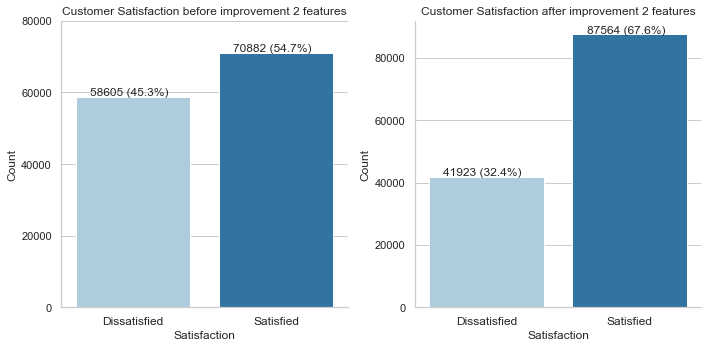

In [131]:
#compare data_awal and df_compare to see customer satisfaction rate
fig,ax = plt.subplots(1,2,figsize=(10,5))

g = sns.countplot(data=data_awal, x='satisfaction_label',ax=ax[0], palette = 'Paired')
ax[0].set_title('Customer Satisfaction before improvement 2 features', fontsize = 12)
ax[0].set_yticks(range(0,100000,20000))
ax[0].set_xlabel('Satisfaction', fontsize=12)
ax[0].set_xticklabels(['Dissatisfied','Satisfied'], fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

for p in g.patches:
    g.annotate(str(p.get_height())+' ('+str((p.get_height()/len(data_awal)*100).round(1))+'%)',(p.get_x()+0.1,p.get_height()+400))

g = sns.countplot(data=df_compare, x='satisfaction_label',ax=ax[1], palette = 'Paired')
ax[1].set_title('Customer Satisfaction after improvement 2 features', fontsize=12)
ax[1].set_yticks(range(0,100000,20000))
ax[1].set_xlabel('Satisfaction', fontsize=12)
ax[1].set_xticklabels(['Dissatisfied','Satisfied'], fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

for p in g.patches:
    g.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df_compare)*100).round(1))+'%)',(p.get_x()+0.1,p.get_height()+400))

plt.tight_layout()
sns.despine()

from the graph we conclude that improvement of 2 features impact on increasing customer satisfaction from **54.7%** to **67.6%**.